In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn import preprocessing

from sklearn import datasets, linear_model

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, f1_score

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

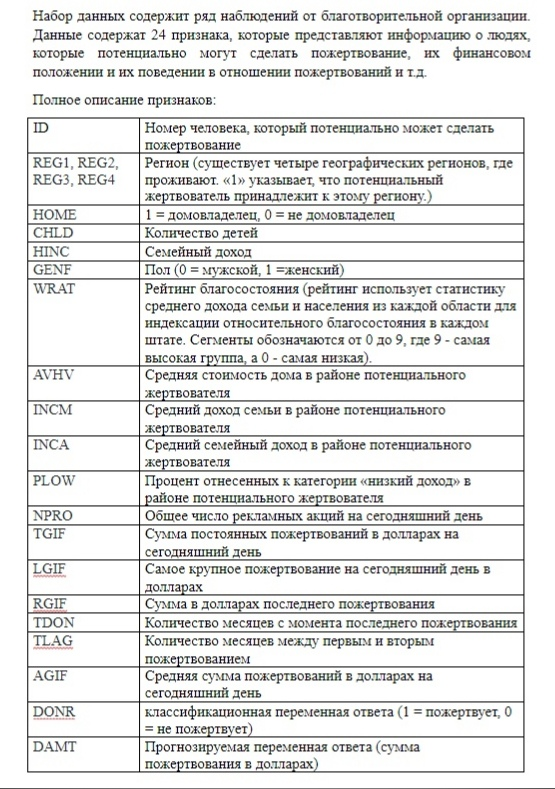

Ваша задача предсказать 'donr'

In [3]:
df_train = pd.read_csv('Real_Train_chr_data.csv')

In [4]:
df_train.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,...,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif,donr
0,927,1836,0,0,0,0,1,2,4,1,...,39,16,113,182,17,9,21,14,12.77,0.0
1,3258,6494,0,0,0,1,1,3,4,0,...,46,27,87,133,37,18,19,5,16.97,0.0
2,45,113,0,1,0,0,1,4,2,0,...,118,1,117,424,11,9,20,3,12.73,1.0
3,1260,2487,0,0,0,0,1,1,4,1,...,41,21,97,304,18,27,10,6,17.13,0.0
4,1096,2153,0,1,0,0,1,0,7,1,...,53,15,116,192,114,23,24,12,17.57,1.0


In [5]:
df_train.shape

(4201, 23)

In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train.shape

(4201, 23)

In [8]:
df_train['donr'].value_counts()

0.0    2126
1.0    2075
Name: donr, dtype: int64

## Данные не имеют пропусков и они ~ сбалансированы

In [9]:
df_train_mod = df_train
df_train_mod = pd.get_dummies(df_train_mod, columns=["chld"])
df_train_mod = pd.get_dummies(df_train_mod, columns=["wrat"])

In [10]:
columns = df_train_mod.columns
print(columns)

Index(['Unnamed: 0', 'ID', 'reg1', 'reg2', 'reg3', 'reg4', 'home', 'hinc',
       'genf', 'avhv', 'incm', 'inca', 'plow', 'npro', 'tgif', 'lgif', 'rgif',
       'tdon', 'tlag', 'agif', 'donr', 'chld_0', 'chld_1', 'chld_2', 'chld_3',
       'chld_4', 'chld_5', 'wrat_0', 'wrat_1', 'wrat_2', 'wrat_3', 'wrat_4',
       'wrat_5', 'wrat_6', 'wrat_7', 'wrat_8', 'wrat_9'],
      dtype='object')


## Масштабируем данные

In [11]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [12]:
scaled_df = data_scaler.fit_transform(df_train_mod)

In [13]:
scaled_df.shape

(4201, 37)

In [14]:
scaled_df = pd.DataFrame(data = scaled_df, columns = columns)

In [15]:
scaled_df

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,hinc,genf,avhv,...,wrat_0,wrat_1,wrat_2,wrat_3,wrat_4,wrat_5,wrat_6,wrat_7,wrat_8,wrat_9
0,0.232739,0.229146,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.108065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.817976,0.810814,0.0,0.0,0.0,1.0,1.0,0.500000,0.0,0.146774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011298,0.013986,0.0,1.0,0.0,0.0,1.0,0.166667,0.0,0.266129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.316344,0.310440,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.177419,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.275169,0.268731,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.206452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.362290,0.353147,0.0,1.0,0.0,0.0,1.0,0.500000,1.0,0.145161,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.528998,0.521229,1.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.191935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.172483,0.342158,1.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.275806,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.298017,0.294081,0.0,1.0,0.0,0.0,1.0,0.500000,1.0,0.037097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.278684,0.547577,1.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.306452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
X_scaled = scaled_df.drop(['donr'], axis = 1)
X_scaled.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,hinc,genf,avhv,...,wrat_0,wrat_1,wrat_2,wrat_3,wrat_4,wrat_5,wrat_6,wrat_7,wrat_8,wrat_9
0,0.232739,0.229146,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.108065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.817976,0.810814,0.0,0.0,0.0,1.0,1.0,0.500000,0.0,0.146774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011298,0.013986,0.0,1.0,0.0,0.0,1.0,0.166667,0.0,0.266129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.316344,0.310440,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.177419,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.275169,0.268731,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.206452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
y_scaled = scaled_df['donr']
y_scaled.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: donr, dtype: float64

## Построим матрицу корелляции 

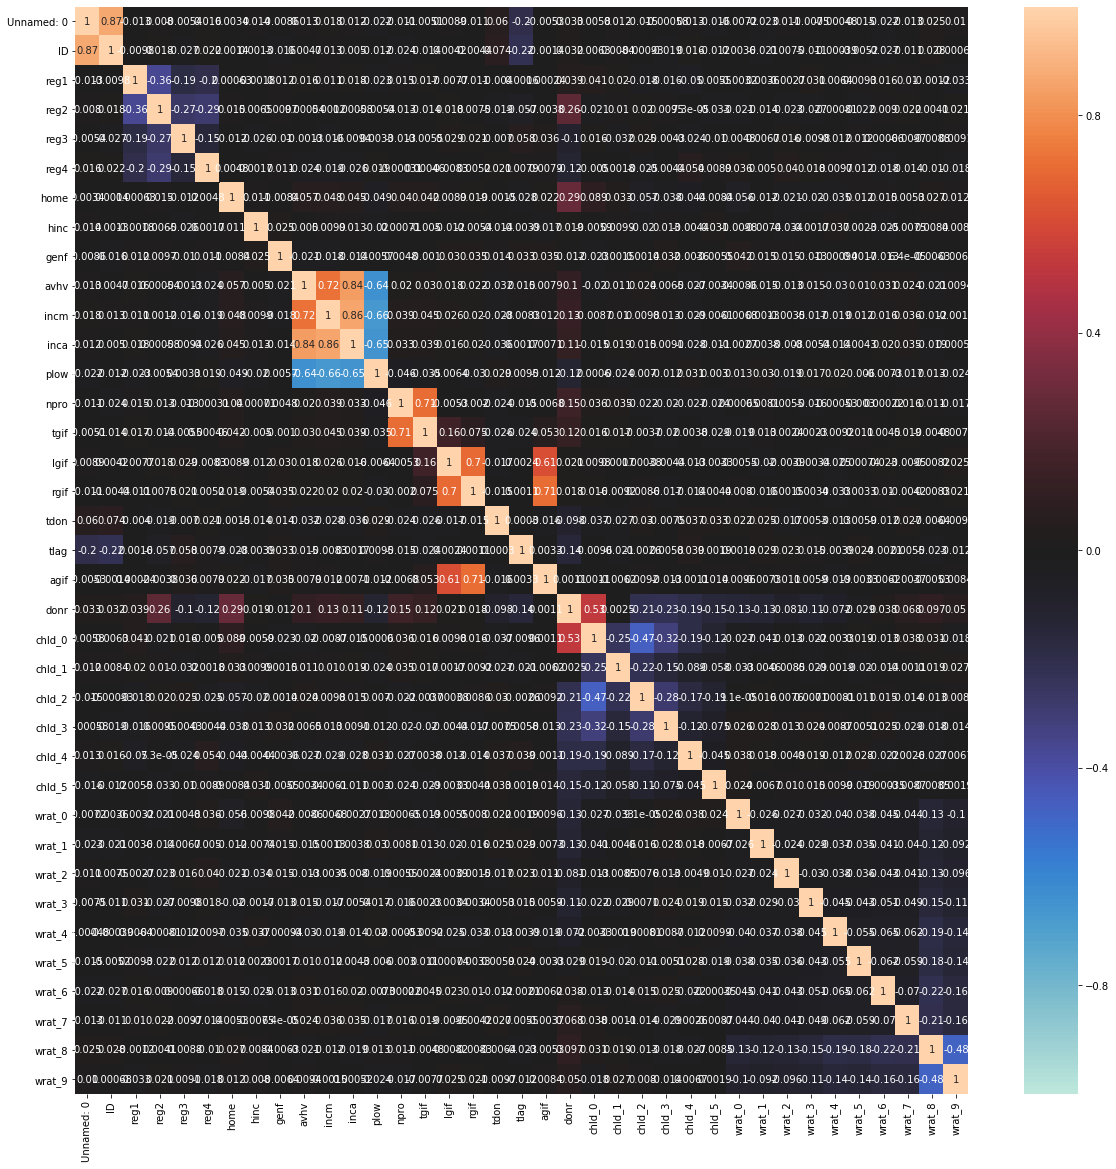

In [18]:
fig, ax = plt.subplots(figsize=(20,20))

corrMatrix = scaled_df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, vmin = -1, vmax = 1, center = 0)
plt.show()

## Попробуем без удалениях кореллируемых данных

In [19]:
rf_classifier_1 = RandomForestClassifier(random_state=0, max_depth=None, max_features='sqrt')

In [20]:
cvs = cross_val_score(rf_classifier_1, X_scaled, y_scaled, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[0.86460808 0.87410926 0.87173397 0.82185273 0.85748219 0.85238095
 0.88066826 0.85441527 0.87350835 0.8353222 ]
Mean model quality value: 0.8586081256804446


In [21]:
rf_classifier_1.fit(X_scaled, y_scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [22]:
df_test = pd.read_csv('Real_Test_chr_data.csv')
df_test.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,...,incm,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif
0,1782,3503,1,0,0,0,1,3,6,1,...,25,41,22,62,86,11,14,17,10,6.41
1,3917,7875,0,1,0,0,1,0,4,1,...,47,47,14,12,41,23,13,15,3,14.55
2,221,484,0,0,0,0,1,2,2,1,...,76,76,2,67,116,67,45,21,4,21.99
3,2135,4240,0,0,0,0,1,3,4,1,...,29,42,20,41,50,27,20,15,15,14.15
4,1841,7349,0,0,1,0,1,5,2,1,...,72,72,2,78,114,17,24,23,6,7.66


In [23]:
df_test_mod = df_test
df_test_mod = pd.get_dummies(df_test_mod, columns=["chld"])
df_test_mod = pd.get_dummies(df_test_mod, columns=["wrat"])

In [24]:
columns_test = df_test_mod.columns
print(columns_test)

Index(['Unnamed: 0', 'ID', 'reg1', 'reg2', 'reg3', 'reg4', 'home', 'hinc',
       'genf', 'avhv', 'incm', 'inca', 'plow', 'npro', 'tgif', 'lgif', 'rgif',
       'tdon', 'tlag', 'agif', 'chld_0', 'chld_1', 'chld_2', 'chld_3',
       'chld_4', 'chld_5', 'wrat_0', 'wrat_1', 'wrat_2', 'wrat_3', 'wrat_4',
       'wrat_5', 'wrat_6', 'wrat_7', 'wrat_8', 'wrat_9'],
      dtype='object')


In [25]:
scaled_df_test = data_scaler.fit_transform(df_test_mod)
scaled_df_test = pd.DataFrame(scaled_df_test, columns = columns_test)
scaled_df_test.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,hinc,genf,avhv,...,wrat_0,wrat_1,wrat_2,wrat_3,wrat_4,wrat_5,wrat_6,wrat_7,wrat_8,wrat_9
0,0.448528,0.437305,1.0,0.0,0.0,0.0,1.0,0.833333,1.0,0.075873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.985905,0.983873,0.0,1.0,0.0,0.0,1.0,0.500000,1.0,0.186646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.055625,0.059882,0.0,0.0,0.0,0.0,1.0,0.166667,1.0,0.127466,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.537377,0.529441,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.156297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.463378,0.918115,0.0,0.0,1.0,0.0,1.0,0.166667,1.0,0.224583,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
y_fin_1 = rf_classifier_1.predict(scaled_df_test)
y_fin_df_1 = pd.DataFrame(y_fin_1, columns=['donr'])

In [27]:
y_fin_df_1

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


## Сделаем модель преподавателя для сравнения

In [28]:
df_train

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,chld,hinc,genf,...,inca,plow,npro,tgif,lgif,rgif,tdon,tlag,agif,donr
0,927,1836,0,0,0,0,1,2,4,1,...,39,16,113,182,17,9,21,14,12.77,0.0
1,3258,6494,0,0,0,1,1,3,4,0,...,46,27,87,133,37,18,19,5,16.97,0.0
2,45,113,0,1,0,0,1,4,2,0,...,118,1,117,424,11,9,20,3,12.73,1.0
3,1260,2487,0,0,0,0,1,1,4,1,...,41,21,97,304,18,27,10,6,17.13,0.0
4,1096,2153,0,1,0,0,1,0,7,1,...,53,15,116,192,114,23,24,12,17.57,1.0
5,1443,2829,0,1,0,0,1,2,4,1,...,47,27,59,83,9,16,20,3,6.28,1.0
6,2107,4175,1,0,0,0,1,3,4,1,...,58,7,76,133,5,4,22,6,5.81,1.0
7,687,2741,1,0,0,0,0,1,4,0,...,71,1,76,132,27,28,14,8,11.41,0.0
8,1187,2356,0,1,0,0,1,1,4,1,...,23,74,27,62,15,7,21,6,11.39,1.0
9,1110,4386,1,0,0,0,1,2,4,0,...,65,4,80,161,5,4,23,7,4.36,1.0


In [29]:
X_prep = df_train.drop('donr', axis=1)
y_prep = df_train['donr']

In [30]:
#обучение на всех данных
fin_mod = linear_model.LogisticRegression(random_state=0)
cvs = cross_val_score(fin_mod, X_prep, y_prep, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.86698337 0.83135392 0.847981   0.84085511 0.83135392 0.81428571
 0.86157518 0.83054893 0.85202864 0.83770883]
Mean model quality value: 0.8414674605379202


In [31]:
fin_mod.fit(X_prep, y_prep)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_fin = fin_mod.predict(df_test)
y_fin_df = pd.DataFrame(y_fin, columns=['donr'])

In [33]:
y_fin_df

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


## Сравним сколько предсказаний отличаются

In [34]:
k = 0
for i in range(y_fin_df.shape[0]):
    if y_fin_df['donr'][i] != y_fin_df_1['donr'][i]:
        k += 1
        
print(k)

258


## Попробуем удалить кореллируемые данные

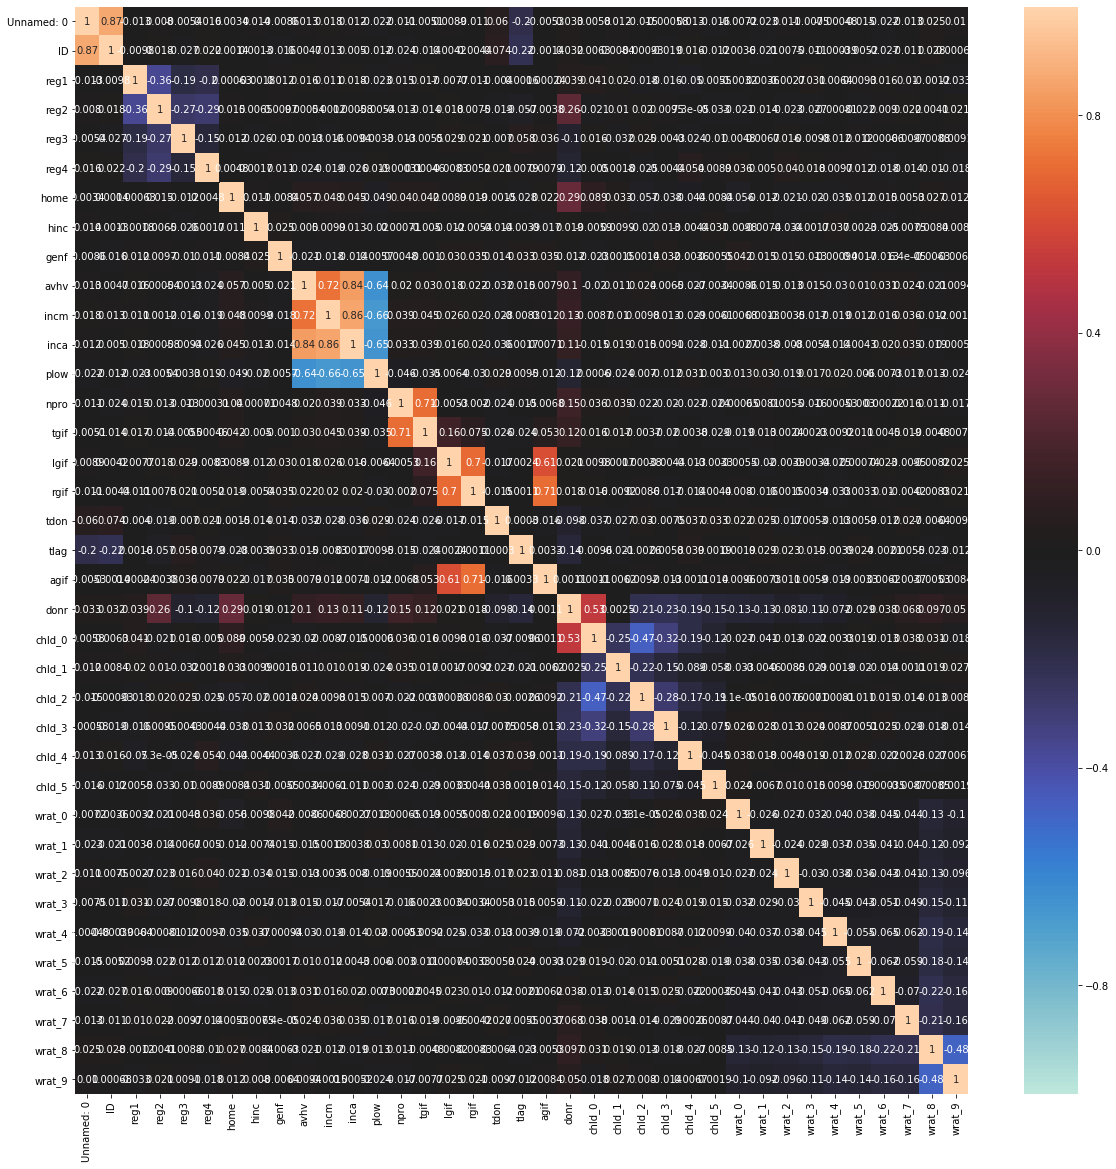

In [35]:
fig, ax = plt.subplots(figsize=(20,20))

corrMatrix = scaled_df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, vmin = -1, vmax = 1, center = 0)
plt.show()

In [36]:
scaled_df.drop(['ID', 'inca', 'tgif', 'avhv', 'plow', 'rgif', 'lgif'], axis = 1, inplace = True)

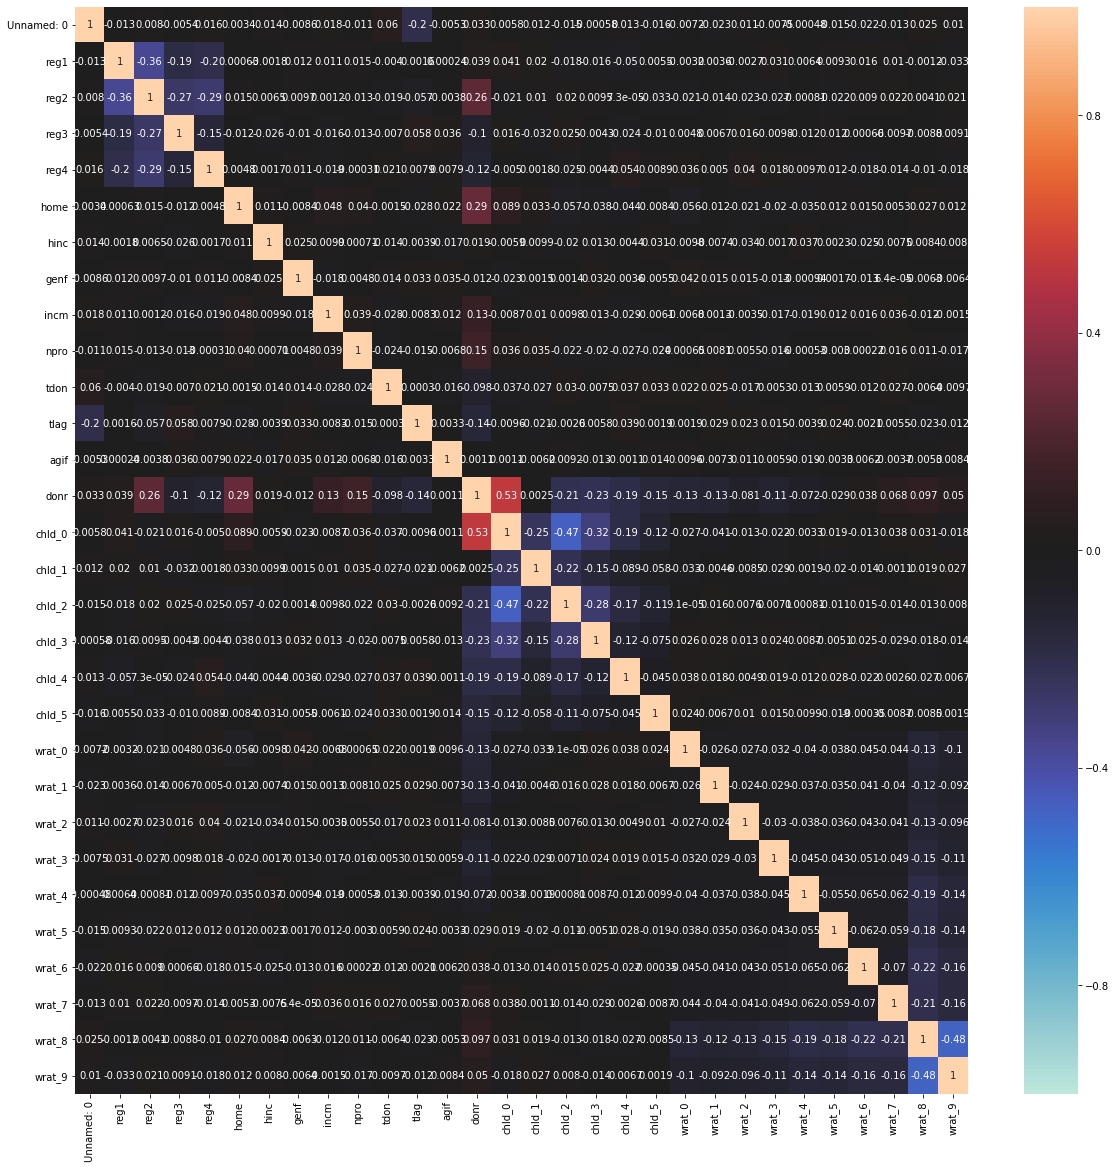

In [37]:
fig, ax = plt.subplots(figsize=(20,20))

corrMatrix = scaled_df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, vmin = -1, vmax = 1, center = 0)
plt.show()

In [38]:
X_scaled_del = scaled_df.drop(['donr'], axis = 1)
X_scaled.head()

,Unnamed: 0,ID,reg1,reg2,reg3,reg4,home,hinc,genf,avhv,...,wrat_0,wrat_1,wrat_2,wrat_3,wrat_4,wrat_5,wrat_6,wrat_7,wrat_8,wrat_9
0,0.232739,0.229146,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.108065,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.817976,0.810814,0.0,0.0,0.0,1.0,1.0,0.500000,0.0,0.146774,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.011298,0.013986,0.0,1.0,0.0,0.0,1.0,0.166667,0.0,0.266129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.316344,0.310440,0.0,0.0,0.0,0.0,1.0,0.500000,1.0,0.177419,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.275169,0.268731,0.0,1.0,0.0,0.0,1.0,1.000000,1.0,0.206452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
y_scaled_del = scaled_df['donr']
y_scaled_del.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: donr, dtype: float64

In [40]:
rf_classifier_2 = RandomForestClassifier(random_state=0, max_depth=5, max_features='sqrt')

In [41]:
cvs = cross_val_score(rf_classifier_1, X_scaled_del, y_scaled_del, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.87885986 0.86935867 0.86935867 0.8456057  0.89073634 0.86428571
 0.89498807 0.85441527 0.87828162 0.84009547]
Mean model quality value: 0.8685985383784974


In [42]:
rf_classifier_2.fit(X_scaled_del, y_scaled_del)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [43]:
scaled_df_test_del = scaled_df_test.drop(['ID', 'inca', 'tgif', 'avhv', 'plow', 'rgif', 'lgif'], axis = 1)

In [44]:
y_fin_2 = rf_classifier_2.predict(scaled_df_test_del)
y_fin_df_2 = pd.DataFrame(y_fin_2, columns=['donr'])

In [45]:
y_fin_df_2

,donr
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0


In [56]:
filename = '201217_Kuzevanov_1.csv'
y_fin_df_2.to_csv(filename, index=None)

## Сравним сколько предсказаний этой модели отличаются от предсказаний преподавателя

In [46]:
k = 0
for i in range(y_fin_df.shape[0]):
    if y_fin_df['donr'][i] != y_fin_df_2['donr'][i]:
        k += 1
        
print(k)

240


## Наивный байесовский алгоритм

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb = GaussianNB()

In [49]:
cvs = cross_val_score(gnb, X_prep, y_prep, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.80997625 0.7672209  0.81710214 0.83610451 0.78859857 0.79047619
 0.81861575 0.8353222  0.82100239 0.8353222 ]
Mean model quality value: 0.8119741095606038


In [50]:
cvs = cross_val_score(gnb, X_scaled, y_scaled, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.74346793 0.72921615 0.74109264 0.74346793 0.73871734 0.73095238
 0.75178998 0.74463007 0.76610979 0.71360382]
Mean model quality value: 0.7403048027753101


In [51]:
cvs = cross_val_score(gnb, X_scaled_del, y_scaled_del, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.73634204 0.71971496 0.73396675 0.73159145 0.72446556 0.71428571
 0.73508353 0.74463007 0.75656325 0.69928401]
Mean model quality value: 0.7295927333569271


In [52]:
model = gnb.fit(X_scaled_del, y_scaled_del)

In [53]:
y_fin_3 = model.predict(scaled_df_test_del)
y_fin_df_3 = pd.DataFrame(y_fin_3, columns=['donr'])

In [54]:
y_fin_df_3

,donr
0,1.0
1,1.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,1.0
9,1.0


In [55]:
k = 0
for i in range(y_fin_df.shape[0]):
    if y_fin_df['donr'][i] != y_fin_df_3['donr'][i]:
        k += 1
        
print(k)

423
